In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:33<00:00, 42.7MB/s]
100% 1.03G/1.03G [00:33<00:00, 33.1MB/s]


In [4]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import os
os.listdir("asl_alphabet_train/asl_alphabet_train/A")

['A331.jpg',
 'A505.jpg',
 'A2924.jpg',
 'A2886.jpg',
 'A2788.jpg',
 'A2150.jpg',
 'A1292.jpg',
 'A2034.jpg',
 'A306.jpg',
 'A1579.jpg',
 'A117.jpg',
 'A364.jpg',
 'A1208.jpg',
 'A2905.jpg',
 'A2071.jpg',
 'A820.jpg',
 'A2859.jpg',
 'A1299.jpg',
 'A2063.jpg',
 'A2101.jpg',
 'A2953.jpg',
 'A1064.jpg',
 'A2567.jpg',
 'A699.jpg',
 'A2243.jpg',
 'A2679.jpg',
 'A626.jpg',
 'A2182.jpg',
 'A1135.jpg',
 'A730.jpg',
 'A1240.jpg',
 'A525.jpg',
 'A1488.jpg',
 'A2884.jpg',
 'A897.jpg',
 'A1082.jpg',
 'A1734.jpg',
 'A973.jpg',
 'A1537.jpg',
 'A1751.jpg',
 'A1769.jpg',
 'A2188.jpg',
 'A776.jpg',
 'A1897.jpg',
 'A101.jpg',
 'A514.jpg',
 'A639.jpg',
 'A1660.jpg',
 'A466.jpg',
 'A1233.jpg',
 'A2959.jpg',
 'A2471.jpg',
 'A844.jpg',
 'A2574.jpg',
 'A131.jpg',
 'A2923.jpg',
 'A411.jpg',
 'A2319.jpg',
 'A2215.jpg',
 'A161.jpg',
 'A719.jpg',
 'A1431.jpg',
 'A1821.jpg',
 'A2787.jpg',
 'A1661.jpg',
 'A2769.jpg',
 'A830.jpg',
 'A2876.jpg',
 'A2680.jpg',
 'A2621.jpg',
 'A1863.jpg',
 'A2161.jpg',
 'A2242.jpg',
 

['A331.jpg', 'A505.jpg', 'A2924.jpg', 'A2886.jpg', 'A2788.jpg']
asl_alphabet_train/asl_alphabet_train/A/A331.jpg


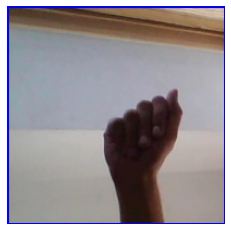

asl_alphabet_train/asl_alphabet_train/A/A505.jpg


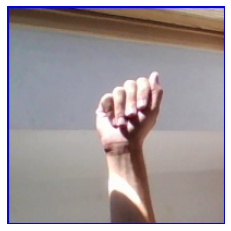

asl_alphabet_train/asl_alphabet_train/A/A2924.jpg


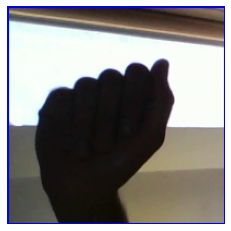

asl_alphabet_train/asl_alphabet_train/A/A2886.jpg


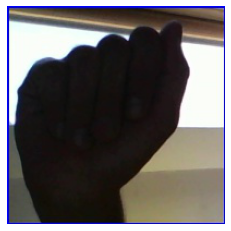

asl_alphabet_train/asl_alphabet_train/A/A2788.jpg


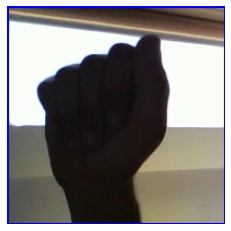

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

example_dir= os.path.join("asl_alphabet_train/asl_alphabet_train/A")
example= os.listdir(example_dir)
print(example[:5])

pic_index = 5
next_example= [os.path.join(example_dir, fname) for fname in example]

for i, img_path in enumerate(next_example[:5]):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "asl_alphabet_train/asl_alphabet_train/"
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory=train_dir,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory(batch_size=32,
                                                 directory=train_dir,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 color_mode="rgb",
                                                 shuffle=True,
                                                 class_mode='categorical')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [6]:
import keras
base_model = keras.applications.VGG16(
    weights="imagenet", 
    input_shape=(200, 200, 3),
    include_top=False 
) 
base_model.trainable = False

inputs = keras.Input(shape=(200, 200, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation="relu")(x)
outputs = keras.layers.Dense(29, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3741      
Total params: 14,784,093
Trainable params: 69,405
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(
      train_dataset,
      epochs=5,
      validation_data=validation_dataset)

Epoch 1/5
2175/2175 [==============================] - 641s 277ms/step - loss: 1.8411 - accuracy: 0.5631 - val_loss: 0.6900 - val_accuracy: 0.8130
Epoch 2/5
2175/2175 [==============================] - 595s 274ms/step - loss: 0.2965 - accuracy: 0.9360 - val_loss: 0.5210 - val_accuracy: 0.8324
Epoch 3/5
2175/2175 [==============================] - 595s 273ms/step - loss: 0.1480 - accuracy: 0.9679 - val_loss: 0.4414 - val_accuracy: 0.8590
Epoch 4/5
2175/2175 [==============================] - 594s 273ms/step - loss: 0.0894 - accuracy: 0.9813 - val_loss: 0.4176 - val_accuracy: 0.8647
Epoch 5/5
2175/2175 [==============================] - 593s 273ms/step - loss: 0.0619 - accuracy: 0.9876 - val_loss: 0.4381 - val_accuracy: 0.8620


In [10]:
import tensorflow as tf
tf.saved_model.save(model, 'vgg16')

INFO:tensorflow:Assets written to: vgg16/assets
